# Processing some addresses

For this exercise, we shall look at the file `random_addresses.html` which is available on the course website. Download this file onto your computer, we will assume that the file is in the same directory as this notebook. 

Our aim will be to identify the different ways that a house address is described in terms of "Road", "Street" etc. and to count the occurrences of the different cases.

In [2]:
ADDRESS_FILE = "random_addresses.html"

First, let's read in the data and have a look at it.

In [8]:
with open(ADDRESS_FILE) as f:
    contents = f.read()

print(contents)

<html><head>
<meta http-equiv="content-type" content="text/html; charset=windows-1252"><title>Sample Addresses!</title></head>
<body>
<h1> A page full of sample addresses for your parsing enjoyment!</h1>
<h2> (All data is random....)</h2>
<ul>
<li>Cecilia Chapman<br>711-2880 Nulla St.<br>Mankato Mississippi 96522<br>(257) 563-7401</li>
<li>Iris Watson<br>P.O. Box 283 8562 Fusce Rd.<br>Frederick Nebraska 20620<br>(372) 587-2335</li>
<li>Celeste Slater<br>606-3727 Ullamcorper. Street<br>Roseville NH 11523<br>(786) 713-8616</li>
<li>Theodore Lowe<br>Ap #867-859 Sit Rd.<br>Azusa New York 39531<br>(793) 151-6230</li>
<li>Calista Wise<br>7292 Dictum Av.<br>San Antonio MI 47096<br>(492) 709-6392</li>
<li>Kyla Olsen<br>Ap #651-8679 Sodales Av.<br>Tamuning PA 10855<br>(654) 393-5734</li>
<li>Forrest Ray<br>191-103 Integer Rd.<br>Corona New Mexico 08219<br>(404) 960-3807</li>
<li>Hiroko Potter<br>P.O. Box 887 2508 Dolor. Av.<br>Muskegon KY 12482<br>(314) 244-6306</li>
<li>Nyssa Vazquez<br>511-57

Each line of the HTML file contains a street address. Our aim is to count how many of the addresses are on a 'Street', 'Avenue', 'Road', and so on.
In order to do this more easily we would like to have a list of addresses, instead of a single string of HTML.

In [9]:
contents.split()

['<html><head>',
 '<meta',
 'http-equiv="content-type"',
 'content="text/html;',
 'charset=windows-1252"><title>Sample',
 'Addresses!</title></head>',
 '<body>',
 '<h1>',
 'A',
 'page',
 'full',
 'of',
 'sample',
 'addresses',
 'for',
 'your',
 'parsing',
 'enjoyment!</h1>',
 '<h2>',
 '(All',
 'data',
 'is',
 'random....)</h2>',
 '<ul>',
 '<li>Cecilia',
 'Chapman<br>711-2880',
 'Nulla',
 'St.<br>Mankato',
 'Mississippi',
 '96522<br>(257)',
 '563-7401</li>',
 '<li>Iris',
 'Watson<br>P.O.',
 'Box',
 '283',
 '8562',
 'Fusce',
 'Rd.<br>Frederick',
 'Nebraska',
 '20620<br>(372)',
 '587-2335</li>',
 '<li>Celeste',
 'Slater<br>606-3727',
 'Ullamcorper.',
 'Street<br>Roseville',
 'NH',
 '11523<br>(786)',
 '713-8616</li>',
 '<li>Theodore',
 'Lowe<br>Ap',
 '#867-859',
 'Sit',
 'Rd.<br>Azusa',
 'New',
 'York',
 '39531<br>(793)',
 '151-6230</li>',
 '<li>Calista',
 'Wise<br>7292',
 'Dictum',
 'Av.<br>San',
 'Antonio',
 'MI',
 '47096<br>(492)',
 '709-6392</li>',
 '<li>Kyla',
 'Olsen<br>Ap',
 '#651-8

In [4]:
lines = contents.split('\n')

lines[:10]

['<html><head>',
 '<meta http-equiv="content-type" content="text/html; charset=windows-1252"><title>Sample Addresses!</title></head>',
 '<body>',
 '<h1> A page full of sample addresses for your parsing enjoyment!</h1>',
 '<h2> (All data is random....)</h2>',
 '<ul>',
 '<li>Cecilia Chapman<br>711-2880 Nulla St.<br>Mankato Mississippi 96522<br>(257) 563-7401</li>',
 '<li>Iris Watson<br>P.O. Box 283 8562 Fusce Rd.<br>Frederick Nebraska 20620<br>(372) 587-2335</li>',
 '<li>Celeste Slater<br>606-3727 Ullamcorper. Street<br>Roseville NH 11523<br>(786) 713-8616</li>',
 '<li>Theodore Lowe<br>Ap #867-859 Sit Rd.<br>Azusa New York 39531<br>(793) 151-6230</li>']

The first few lines are meta data, we're only interested in the lines that are part of the list of addresses. 

In [5]:
addresses = [line for line in lines if line.startswith('<li>')]

addresses[:10]

['<li>Cecilia Chapman<br>711-2880 Nulla St.<br>Mankato Mississippi 96522<br>(257) 563-7401</li>',
 '<li>Iris Watson<br>P.O. Box 283 8562 Fusce Rd.<br>Frederick Nebraska 20620<br>(372) 587-2335</li>',
 '<li>Celeste Slater<br>606-3727 Ullamcorper. Street<br>Roseville NH 11523<br>(786) 713-8616</li>',
 '<li>Theodore Lowe<br>Ap #867-859 Sit Rd.<br>Azusa New York 39531<br>(793) 151-6230</li>',
 '<li>Calista Wise<br>7292 Dictum Av.<br>San Antonio MI 47096<br>(492) 709-6392</li>',
 '<li>Kyla Olsen<br>Ap #651-8679 Sodales Av.<br>Tamuning PA 10855<br>(654) 393-5734</li>',
 '<li>Forrest Ray<br>191-103 Integer Rd.<br>Corona New Mexico 08219<br>(404) 960-3807</li>',
 '<li>Hiroko Potter<br>P.O. Box 887 2508 Dolor. Av.<br>Muskegon KY 12482<br>(314) 244-6306</li>',
 '<li>Nyssa Vazquez<br>511-5762 At Rd.<br>Chelsea MI 67708<br>(947) 278-5929</li>',
 '<li>Lawrence Moreno<br>935-9940 Tortor. Street<br>Santa Rosa MN 98804<br>(684) 579-1879</li>']

And it would be better to get rid of the HTML`<li>` and `</li>` tags.

In [6]:
addresses = [address[4:-5] for address in addresses]

addresses[:10]

['Cecilia Chapman<br>711-2880 Nulla St.<br>Mankato Mississippi 96522<br>(257) 563-7401',
 'Iris Watson<br>P.O. Box 283 8562 Fusce Rd.<br>Frederick Nebraska 20620<br>(372) 587-2335',
 'Celeste Slater<br>606-3727 Ullamcorper. Street<br>Roseville NH 11523<br>(786) 713-8616',
 'Theodore Lowe<br>Ap #867-859 Sit Rd.<br>Azusa New York 39531<br>(793) 151-6230',
 'Calista Wise<br>7292 Dictum Av.<br>San Antonio MI 47096<br>(492) 709-6392',
 'Kyla Olsen<br>Ap #651-8679 Sodales Av.<br>Tamuning PA 10855<br>(654) 393-5734',
 'Forrest Ray<br>191-103 Integer Rd.<br>Corona New Mexico 08219<br>(404) 960-3807',
 'Hiroko Potter<br>P.O. Box 887 2508 Dolor. Av.<br>Muskegon KY 12482<br>(314) 244-6306',
 'Nyssa Vazquez<br>511-5762 At Rd.<br>Chelsea MI 67708<br>(947) 278-5929',
 'Lawrence Moreno<br>935-9940 Tortor. Street<br>Santa Rosa MN 98804<br>(684) 579-1879']

To make the addresses easier to deal with we want each one represented as a list instead of a string. One line of an addresses is one entry in the list. For example, `'Cecilia Chapman<br>711-2880 Nulla St.<br>Mankato Mississippi 96522<br>(257) 563-7401'` will become 

['Cecilia Chapman',
  '711-2880 Nulla St.',
  'Mankato Mississippi 96522',
  '(257) 563-7401']

In [7]:
addresses = [address.split('<br>') for address in addresses]

addresses[:10]

[['Cecilia Chapman',
  '711-2880 Nulla St.',
  'Mankato Mississippi 96522',
  '(257) 563-7401'],
 ['Iris Watson',
  'P.O. Box 283 8562 Fusce Rd.',
  'Frederick Nebraska 20620',
  '(372) 587-2335'],
 ['Celeste Slater',
  '606-3727 Ullamcorper. Street',
  'Roseville NH 11523',
  '(786) 713-8616'],
 ['Theodore Lowe',
  'Ap #867-859 Sit Rd.',
  'Azusa New York 39531',
  '(793) 151-6230'],
 ['Calista Wise', '7292 Dictum Av.', 'San Antonio MI 47096', '(492) 709-6392'],
 ['Kyla Olsen',
  'Ap #651-8679 Sodales Av.',
  'Tamuning PA 10855',
  '(654) 393-5734'],
 ['Forrest Ray',
  '191-103 Integer Rd.',
  'Corona New Mexico 08219',
  '(404) 960-3807'],
 ['Hiroko Potter',
  'P.O. Box 887 2508 Dolor. Av.',
  'Muskegon KY 12482',
  '(314) 244-6306'],
 ['Nyssa Vazquez', '511-5762 At Rd.', 'Chelsea MI 67708', '(947) 278-5929'],
 ['Lawrence Moreno',
  '935-9940 Tortor. Street',
  'Santa Rosa MN 98804',
  '(684) 579-1879']]

For this particular task we're interested in the first line of the address (after the person's name).

In [10]:
house_addresses = [address[1] for address in addresses]

house_addresses[:10]

['711-2880 Nulla St.',
 'P.O. Box 283 8562 Fusce Rd.',
 '606-3727 Ullamcorper. Street',
 'Ap #867-859 Sit Rd.',
 '7292 Dictum Av.',
 'Ap #651-8679 Sodales Av.',
 '191-103 Integer Rd.',
 'P.O. Box 887 2508 Dolor. Av.',
 '511-5762 At Rd.',
 '935-9940 Tortor. Street']

Now we want to find the different types of street. This is typically the last word of the first line.

In [13]:
way_types = [ha.split()[-1] for ha in house_addresses]

way_types[:10]

['St.', 'Rd.', 'Street', 'Rd.', 'Av.', 'Av.', 'Rd.', 'Av.', 'Rd.', 'Street']

Notice that there are multiple possibilities for recording the same information. For example, 'Street' and 'St.' are both present. 
We will modify the data to always use a standard spelling for each type of street. 

In [16]:
standard = {
             "Av." : "Avenue",
             "Ave" : "Avenue",
             "Rd." : "Road",
             "St." : "Street",
           }

def standardise(name):
    if name in standard:
        return standard[name]
    else:
        return name
    
# use list comprehension with the above function.
# each value in way_type is replaced by its standardised version.
way_types = [standardise(way_type) for way_type in way_types]
#way_types

Let's check what different values we have in the standardised list. 

In [17]:
set(way_types)

{'Avenue', 'Road', 'Street'}

Now we're in a good position to answer the original question. How many of the addresses are a 'street' 'avenue' or 'road'?

In [18]:
way_type_freq = {}

for wt in way_types:
    if wt in way_type_freq.keys():
        way_type_freq[wt] += 1
    else:
        way_type_freq[wt] = 1

way_type_freq

{'Street': 36, 'Road': 31, 'Avenue': 33}

This is a simple exercise but it is illustrative of a common data quality issue. Small, seemingly insignificant differences in the way that data is initially recorded can lead to mistakes in the data analysis. If we had not noticed the different ways of recording 'Avenue' as 'Av.' or 'Ave.' then we could have counted the occurrences of different address types, the code would have run, but the results could have been misleading. Perhaps this task might have formed part of a larger project to see how house prices are related to the type of road that the house is on. The whole analysis could be harmed if simple things like different spellings used in the data set have not been properly checked and managed. 

## Displaying the Data in a Pie Chart
Now that we have some results, we may like to see them in a visual form.
The following code uses the `matplotlib` package to display the
frequency of the different road name classes as a _pie chart_.

([<matplotlib.patches.Wedge at 0x1b21be79e20>,
 [Text(0.995309778760989, 0.46835717599151955, 'Street'),
  Text(-0.10351925128402176, -1.0951181509835346, 'Road'),
  Text(-0.9468161479199448, 0.5599456956152421, 'Avenue')])

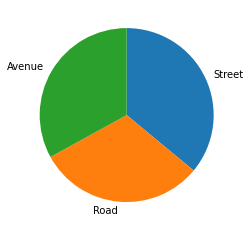

In [19]:
import matplotlib.pyplot as plt

labels = [k for k in way_type_freq]

vals = [way_type_freq[k] for k in way_type_freq]
vals

plt.pie( vals, labels=labels, startangle = 90, counterclock=False )